In [23]:
words = open('names.txt', 'r').read().splitlines()

In [24]:
import torch

N = torch.zeros((27, 27), dtype = torch.int32)

chars = sorted(list(set(''.join(words))))

stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0

itos = {i:s for s,i in stoi.items()}

In [25]:
P = N.float()
P /= P.sum(1, keepdim=True)

In [26]:
#Creating the training set of bigrams (x,y)
xs, ys = [], []

for word in words[:1]:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [5]:
xs

tensor([ 0,  5, 13, 13,  1])

In [6]:
ys

tensor([ 5, 13, 13,  1,  0])

In [18]:
#Feeding these examples into a neural network
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float() #IMP: manual type casting
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [20]:
xenc.shape

torch.Size([5, 27])

In [16]:
import matplotlib.pyplot as plt

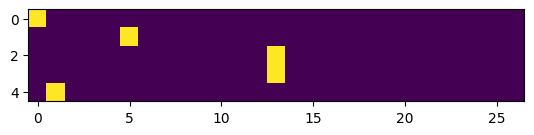

In [21]:
plt.imshow(xenc)

In [ ]:
W = torch.randn((27, 27))   #Generating the weights
xenc @ W    #Doing matrix multiplication

tensor([[ 0.5838, -0.8614,  0.1874, -0.5662,  0.2449,  1.4738,  1.8403,  0.3233,
          1.0014,  0.0263, -0.5269, -0.8413,  0.0329, -0.0670, -0.7272, -0.2977,
         -0.5083,  0.1050, -0.5482,  1.0237,  1.2359,  1.6366, -1.6188,  0.3283,
          0.7180, -0.9729, -1.5425],
        [ 1.4868, -0.0457,  0.2224,  1.5423, -0.0151, -0.2254,  0.7613, -0.4738,
         -0.2175, -0.9024,  0.0148,  0.6673, -0.1291, -1.4357,  0.2100, -0.5559,
         -0.0711, -0.1631,  0.1704,  0.5689, -1.2534, -0.0207,  0.2485,  0.9525,
          0.1465,  0.1339,  0.1875],
        [-0.3253,  0.6007,  1.3449,  0.0990, -0.6273,  0.4972, -0.2262,  0.4910,
         -1.6546,  0.5298, -0.3165, -0.7659,  0.9075, -0.4458,  0.9129, -2.7461,
          0.0098,  0.9013,  0.7363, -0.7745, -0.8155,  1.5463,  0.0723, -0.5926,
         -0.2548,  0.4572, -0.9398],
        [-0.3253,  0.6007,  1.3449,  0.0990, -0.6273,  0.4972, -0.2262,  0.4910,
         -1.6546,  0.5298, -0.3165, -0.7659,  0.9075, -0.4458,  0.9129, -2.7461

In [ ]:
#Checking for one element
(xenc @ W)[3, 13]

tensor(-0.4458)

In [ ]:
#Doing manual multiplication for verifying
(xenc[3] * W[:,13]).sum()

tensor(-0.4458)

In [ ]:
logits = xenc @ W   #log-counts
counts = logits.exp()   #equivalent to N, as done in A-Main-Notebook
probs = counts / counts.sum(1, keepdims=True)   #Normalising the rows (as we had done in A-Main as well. To calculate the probability)
probs

tensor([[0.0415, 0.0098, 0.0279, 0.0132, 0.0296, 0.1012, 0.1459, 0.0320, 0.0631,
         0.0238, 0.0137, 0.0100, 0.0239, 0.0217, 0.0112, 0.0172, 0.0139, 0.0257,
         0.0134, 0.0645, 0.0797, 0.1190, 0.0046, 0.0322, 0.0475, 0.0088, 0.0050],
        [0.1218, 0.0263, 0.0344, 0.1287, 0.0271, 0.0220, 0.0589, 0.0171, 0.0221,
         0.0112, 0.0279, 0.0537, 0.0242, 0.0066, 0.0340, 0.0158, 0.0256, 0.0234,
         0.0326, 0.0486, 0.0079, 0.0270, 0.0353, 0.0714, 0.0319, 0.0315, 0.0332],
        [0.0199, 0.0501, 0.1055, 0.0303, 0.0147, 0.0452, 0.0219, 0.0449, 0.0053,
         0.0467, 0.0200, 0.0128, 0.0681, 0.0176, 0.0685, 0.0018, 0.0278, 0.0677,
         0.0574, 0.0127, 0.0122, 0.1290, 0.0295, 0.0152, 0.0213, 0.0434, 0.0107],
        [0.0199, 0.0501, 0.1055, 0.0303, 0.0147, 0.0452, 0.0219, 0.0449, 0.0053,
         0.0467, 0.0200, 0.0128, 0.0681, 0.0176, 0.0685, 0.0018, 0.0278, 0.0677,
         0.0574, 0.0127, 0.0122, 0.1290, 0.0295, 0.0152, 0.0213, 0.0434, 0.0107],
        [0.0146, 0.0385,

-------------

-----------

In [ ]:
# SUMMARY ------------------------------>>>>
#Run the first 4 cells of this notebook and then continue

In [27]:
xs

tensor([ 0,  5, 13, 13,  1])

In [28]:
ys

tensor([ 5, 13, 13,  1,  0])

In [29]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [30]:

xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [31]:
probs.shape

torch.Size([5, 27])

In [32]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character: 0.

--------------------